## Historical Concert & Economic Data

### Exploratory Data Analysis

Team 5 - 5806

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

Start by loading state quarterly GDP data

In [3]:
sqgdp = pd.read_csv("Data/SQGDP.csv")

Clean this economic data

In [4]:
excluded_geos = ['United States', 'New England', 'Mideast', 'Great Lakes', 'Plains', 'Southeast', 
                 'Rocky Mountain', 'Far West', 'Southwest']

state_quarterly_gdps = sqgdp[(sqgdp['LineCode'] == 1) & ~(sqgdp['GeoName'].isin(excluded_geos))]

excluded_columns = ['GeoFIPS', 'Region', 'TableName', 'LineCode', 'IndustryClassification', 'Description', 'Unit']

state_quarterly_gdps = state_quarterly_gdps.drop(excluded_columns, axis=1)
state_quarterly_gdps = state_quarterly_gdps.drop(state_quarterly_gdps.iloc[:, 1:-21], axis=1)

state_quarterly_gdps = state_quarterly_gdps.rename(columns={'GeoName': 'State'})
state_quarterly_gdps = state_quarterly_gdps.set_index('State')

In [5]:
state_quarterly_gdps

,2014:Q4,2015:Q1,2015:Q2,2015:Q3,2015:Q4,2016:Q1,2016:Q2,2016:Q3,2016:Q4,2017:Q1,...,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3,2019:Q4
State,,,,,,,,,,,,,,,,,,,,,
Alabama,188292.7,187605.0,189727.6,190535.1,189488.8,189832.9,191008.8,190751.8,191218.7,191910.7,...,192940.6,195345.0,196462.2,197698.7,199129.0,200453.8,201554.6,202432.7,203289.5,204484.3
Alaska,53772.0,54326.2,53768.7,53634.9,53464.8,53531.7,52761.0,52314.6,52235.5,52406.2,...,53177.0,52738.3,52638.9,52825.5,53289.1,53616.0,53856.2,54402.3,54727.1,54786.0
Arizona,274960.6,277961.2,280165.1,279772.0,283019.8,284338.7,288306.4,291788.7,292487.9,295470.3,...,301834.2,303625.1,307712.1,309716.9,313807.9,315585.6,318103.5,320415.8,322292.9,324915.4
Arkansas,114027.1,112721.8,113533.7,114586.3,114601.9,114283.1,114751.7,114285.6,114844.3,115234.6,...,114851.7,115975.9,116256.2,117337.1,117606.1,117975.7,118447.2,118975.1,119815.6,120535.7
California,2350411.0,2396326.0,2437555.5,2439686.8,2440825.2,2478530.1,2484499.7,2510596.8,2530175.1,2557629.3,...,2624367.1,2668034.2,2681388.1,2720177.3,2732524.9,2752513.7,2771273.1,2784467.2,2798677.2,2813699.0
Colorado,303570.0,306561.9,307933.6,310146.3,312076.7,311142.0,314133.1,319164.0,322568.0,323960.3,...,332138.4,335408.4,336142.0,340405.5,342943.1,344816.3,349449.0,351997.1,354299.5,356560.8
Connecticut,240881.3,242317.1,243767.8,242602.7,242955.3,243344.7,243454.6,242174.2,242202.0,241700.2,...,244414.8,244187.3,244658.1,243649.8,246431.1,244964.0,247584.7,248173.3,249471.6,250045.1
Delaware,65026.7,66038.2,67344.4,65301.7,64820.0,63003.4,63279.8,62991.3,63160.5,63433.8,...,62949.7,62272.2,62374.5,62472.7,63317.3,62894.5,62978.8,63260.6,63260.0,63621.5
District of Columbia,115882.0,116879.2,117764.2,117131.6,117178.8,119227.5,119635.7,119253.7,120152.5,120128.8,...,122352.1,121454.0,123158.5,123322.0,124728.4,124717.7,125066.8,125722.9,126168.3,126783.9


In [6]:
# we will use this helper function later to calculate percent change
def percent_change(row):
    return 100 * np.diff(row) / row[1:]

In [7]:
state_gdp_growth = state_quarterly_gdps.apply(percent_change, axis=1)

In [8]:
# format the economic data
stacked_gdp_growth = state_gdp_growth.stack()
stacked_gdp_growth = stacked_gdp_growth.reset_index().rename(columns = {'level_1': 'Quarter', 0: 'GDP Growth'})
stacked_gdp_growth

,State,Quarter,GDP Growth
0,Alabama,2015:Q1,-0.366568
1,Alabama,2015:Q2,1.118762
2,Alabama,2015:Q3,0.423806
3,Alabama,2015:Q4,-0.552170
4,Alabama,2016:Q1,0.181265
...,...,...,...
1015,Wyoming,2018:Q4,0.864746
1016,Wyoming,2019:Q1,1.344903
1017,Wyoming,2019:Q2,1.022071
1018,Wyoming,2019:Q3,0.330360


In [9]:
# download this formatted economic growth data to a csv so we can use it later if needed
stacked_gdp_growth.to_csv("Data/stacked_gdp_growth.csv")

<hr>

Load up the collected concert data

In [10]:
concerts = pd.read_csv("Data/concert_data_8concerts.csv")
concerts

,Tour,Artist,Date,City,State,Attendance (Avg.),Revenue (Avg.)
0,÷ Tour,Ed Sheeran,29 June 2017,Kansas City,Missouri,13382.0,1217313.0
1,÷ Tour,Ed Sheeran,30 June 2017,Des Moines,Iowa,13375.0,1078939.0
2,÷ Tour,Ed Sheeran,1 July 2017,Saint Paul,Minnesota,14938.0,1375063.0
3,÷ Tour,Ed Sheeran,9 July 2017,Buffalo,New York,14305.0,1167095.0
4,÷ Tour,Ed Sheeran,11 July 2017,Philadelphia,Pennsylvania,14461.0,1315130.0
...,...,...,...,...,...,...,...
448,24K Magic World Tour,Bruno Mars,8 November 2018,Honolulu,Hawaii,37917.0,4131527.0
449,24K Magic World Tour,Bruno Mars,10 November 2018,Honolulu,Hawaii,37917.0,4131527.0
450,24K Magic World Tour,Bruno Mars,11 November 2018,Honolulu,Hawaii,37917.0,4131527.0
451,24K Magic World Tour,Bruno Mars,30 December 2018,Las Vegas,Nevada,15121.0,2929784.0


In [11]:
time_format = "%d %B %Y"

def to_datetime(date_string):
    return datetime.strptime(date_string, time_format)

concerts['Date'] = concerts['Date'].apply(to_datetime) 

In [12]:
# taking a pandas datetime object as input, change it to be string format that we care about. ex: 2015:Q4
def get_quarter(date):
    return str(date.year) + ":Q" + str(pd.Timestamp(date).quarter)

In [13]:
concerts['Quarter'] = concerts['Date'].apply(get_quarter)

In [14]:
concerts['Count'] = np.ones(len(concerts))

The newly processed concert data contains the quarter/year for each state and the average attendance and revenue figures for each concert. 

In [15]:
concerts

,Tour,Artist,Date,City,State,Attendance (Avg.),Revenue (Avg.),Quarter,Count
0,÷ Tour,Ed Sheeran,2017-06-29,Kansas City,Missouri,13382.0,1217313.0,2017:Q2,1.0
1,÷ Tour,Ed Sheeran,2017-06-30,Des Moines,Iowa,13375.0,1078939.0,2017:Q2,1.0
2,÷ Tour,Ed Sheeran,2017-07-01,Saint Paul,Minnesota,14938.0,1375063.0,2017:Q3,1.0
3,÷ Tour,Ed Sheeran,2017-07-09,Buffalo,New York,14305.0,1167095.0,2017:Q3,1.0
4,÷ Tour,Ed Sheeran,2017-07-11,Philadelphia,Pennsylvania,14461.0,1315130.0,2017:Q3,1.0
...,...,...,...,...,...,...,...,...,...
448,24K Magic World Tour,Bruno Mars,2018-11-08,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
449,24K Magic World Tour,Bruno Mars,2018-11-10,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
450,24K Magic World Tour,Bruno Mars,2018-11-11,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
451,24K Magic World Tour,Bruno Mars,2018-12-30,Las Vegas,Nevada,15121.0,2929784.0,2018:Q4,1.0


In [16]:
# once again we download this processed data in case we need it later
concerts.to_csv("Data/concerts_with_quarter.csv")

Before, the processed data had 453 rows for each of our 453 concerts in the data. We group our data by state and quarter so that we can get a total revenue and count of concerts that happened in a specific state during a specific quarter

In [17]:
concerts_by_state_quarter = concerts[['State', 'Quarter', 'Revenue (Avg.)', 'Count']].groupby(['State', 'Quarter']).agg('sum').reset_index()
concerts_by_state_quarter = concerts_by_state_quarter.rename(columns = {'Revenue (Avg.)': 'Total Revenue'})
concerts_by_state_quarter

,State,Quarter,Total Revenue,Count
0,Alabama,2019:Q1,3201097.0,2.0
1,Arizona,2016:Q3,6034056.0,2.0
2,Arizona,2017:Q3,10655279.0,3.0
3,Arizona,2017:Q4,1651992.0,1.0
4,Arizona,2018:Q1,1906176.0,1.0
...,...,...,...,...
210,Washington,2019:Q3,11835818.0,1.0
211,Wisconsin,2017:Q4,1403070.0,1.0
212,Wisconsin,2018:Q3,1995140.0,1.0
213,Wisconsin,2018:Q4,5576333.0,2.0


Finally, merge the GDP growth data and the concert data

In [18]:
merged_tables = pd.merge(stacked_gdp_growth, concerts_by_state_quarter[['State', 'Quarter', 'Count', 'Total Revenue']], 
                                             on=["State", "Quarter"], how='left')
merged_tables = merged_tables.fillna(0)

In [19]:
merged_tables

,State,Quarter,GDP Growth,Count,Total Revenue
0,Alabama,2015:Q1,-0.366568,0.0,0.0
1,Alabama,2015:Q2,1.118762,0.0,0.0
2,Alabama,2015:Q3,0.423806,0.0,0.0
3,Alabama,2015:Q4,-0.552170,0.0,0.0
4,Alabama,2016:Q1,0.181265,0.0,0.0
...,...,...,...,...,...
1015,Wyoming,2018:Q4,0.864746,0.0,0.0
1016,Wyoming,2019:Q1,1.344903,0.0,0.0
1017,Wyoming,2019:Q2,1.022071,0.0,0.0
1018,Wyoming,2019:Q3,0.330360,0.0,0.0


In [20]:
merged_tables.to_csv("Data/concert_and_economic_data.csv")

In [21]:
only_concerts = merged_tables[merged_tables['Count'] > 0]

In [22]:
def quarter_from_year_quarter(year_quarter):
    return year_quarter[-2:]

The new column 'Q' now contains which quarter, i.e. 1, 2, 3, or 4

In [23]:
only_concerts['Q'] = only_concerts['Quarter'].apply(quarter_from_year_quarter)

C:\Users\30693\AppData\Local\Temp\ipykernel_2800\3057617110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_concerts['Q'] = only_concerts['Quarter'].apply(quarter_from_year_quarter)


In [24]:
only_concerts.groupby('Q').count()

,State,Quarter,GDP Growth,Count,Total Revenue
Q,,,,,
Q1,30,30,30,30,30
Q2,49,49,49,49,49
Q3,82,82,82,82,82
Q4,54,54,54,54,54


In [25]:
from scipy import stats

# Make a method that will create a scatter plot of params x and y, showing the line of best fit with correlation coefficient.

def plot(x, y, x_label='X', y_label='Y', title='Title'):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line_best_fit = slope * x + intercept
    
    plt.scatter(x, y)
    plt.plot(x, line_best_fit, color='red', label='Best fit line')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(title=f'Correlation: {r_value:.3f}')
    
    return f'Correlation Coefficient: {r_value}' # return correlation coefficient so we can output it if needed

'Correlation Coefficient: 0.1259136234572056'

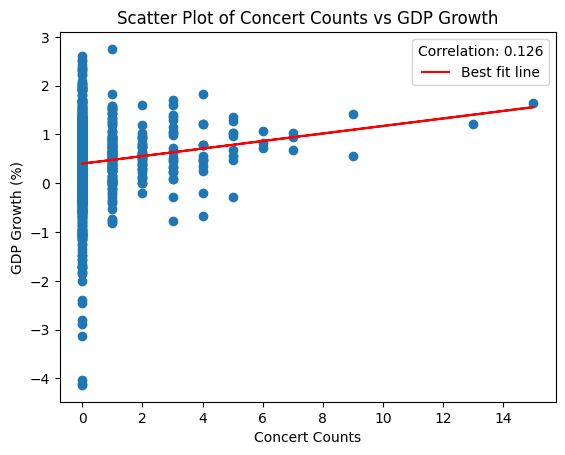

In [26]:

plot(merged_tables['Count'], merged_tables['GDP Growth'], 'Concert Counts', 'GDP Growth (%)', 'Scatter Plot of Concert Counts vs GDP Growth')

As shown by the plot, there seems to be some positive correlation between the number of concerts in a state for a given quarter and the GDP growth of that state during that quarter as indicated by the correlation coefficient of 0.126

'Correlation Coefficient: 0.11251302188209907'

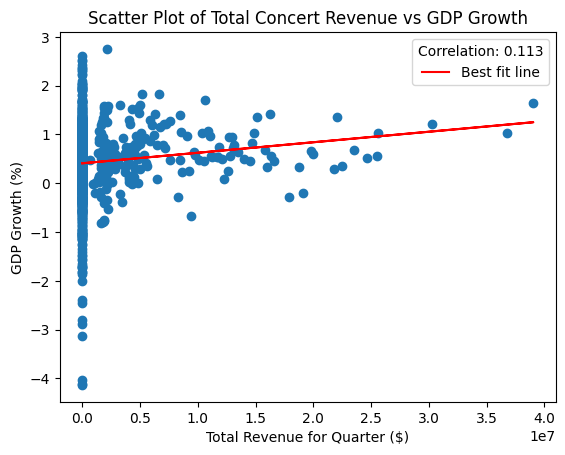

In [27]:
plot(merged_tables['Total Revenue'], merged_tables['GDP Growth'], 'Total Revenue for Quarter ($)', 'GDP Growth (%)', 'Scatter Plot of Total Concert Revenue vs GDP Growth')

We can see a similar positive correlation between total concert revenue in a state for a given quarter and GDP growth in that state during that quarter. The correlation coefficient was 0.1125

Since on both the previous plots we saw most data points showing up at the 0 revenue (0 concerts), next we plot a histogram showing the GDP growth for quarters with concerts versus quarters without concerts

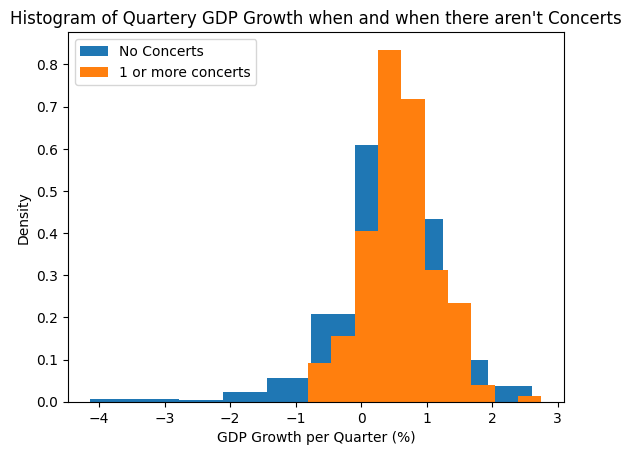

In [28]:
plt.hist(merged_tables[merged_tables['Count'] == 0]['GDP Growth'], density=True, label='No Concerts')
plt.hist(merged_tables[merged_tables['Count'] > 0]['GDP Growth'], density=True, label='1 or more concerts')
plt.xlabel('GDP Growth per Quarter (%)')
plt.ylabel('Density')
plt.title("Histogram of Quartery GDP Growth when and when there aren't Concerts")
plt.legend()


In [29]:
print("No Concert Avg GDP Growth", merged_tables[merged_tables['Count'] == 0]['GDP Growth'].mean())
print("Concert Avg GDP Growth", merged_tables[merged_tables['Count'] > 0]['GDP Growth'].mean())

No Concert Avg GDP Growth 0.39313109840228694
Concert Avg GDP Growth 0.5984164008047624


We see that the mean GDP growth for quarters with one or more concerts was higher than the mean GDP growth for quarters with no concerts. Later we will see if these results are different with any statistical significance.

By manual inspection of the data, we see that California is one of the states with the most concerts. So, we plot it

In [30]:
ca_only = merged_tables[merged_tables['State'] == 'California']
ca_only

,State,Quarter,GDP Growth,Count,Total Revenue
80,California,2015:Q1,1.916058,0.0,0.0
81,California,2015:Q2,1.691428,0.0,0.0
82,California,2015:Q3,0.087360,0.0,0.0
83,California,2015:Q4,0.046640,0.0,0.0
84,California,2016:Q1,1.521261,1.0,4341114.0
85,California,2016:Q2,0.240274,0.0,0.0
86,California,2016:Q3,1.039478,7.0,36758793.0
87,California,2016:Q4,0.773792,2.0,0.0
88,California,2017:Q1,1.073424,1.0,0.0
89,California,2017:Q2,1.352610,3.0,22053371.0


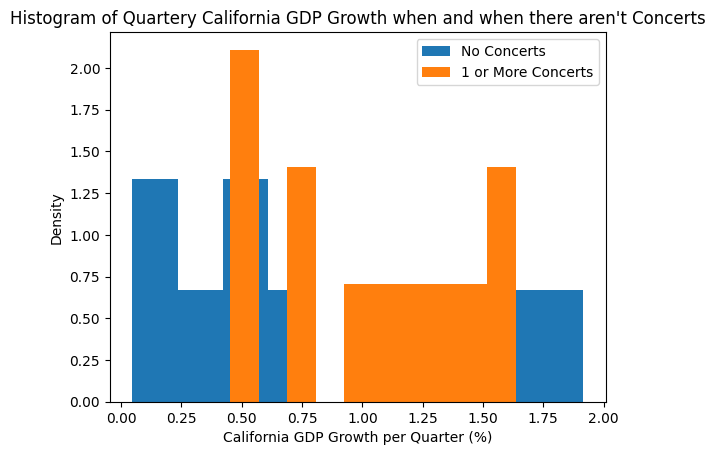

In [31]:
plt.hist(ca_only[ca_only['Count'] == 0]['GDP Growth'], density=True, label='No Concerts')
plt.hist(ca_only[ca_only['Count'] > 0]['GDP Growth'], density=True, label='1 or More Concerts')
plt.xlabel('California GDP Growth per Quarter (%)')
plt.ylabel('Density')
plt.title("Histogram of Quartery California GDP Growth when and when there aren't Concerts")
plt.legend()

In [32]:
print(ca_only[ca_only['Count'] == 0]['GDP Growth'].mean())
print(ca_only[ca_only['Count'] > 0]['GDP Growth'].mean())

0.7113232339689644
1.0158002351139006


We see that for Califronia specifically, the absolute difference in means for quarterly growth with vs without concerts is still positive but less than for all states as we saw before.

Finally, let's see if the differences we saw in quarterly growth for all states when there were 1+ concerts vs 0 concerts is statistically significant with an ab test.

In [33]:
def ab_test(df, obs_value):
    
    diffs_in_mean = np.array([])
    
    n_trials = 1000
    
    for i in range(n_trials):
        df_copy = df.copy()
        
        shuffled_labels = np.random.permutation(df_copy['Count'])
        
        df_copy['Count'] = shuffled_labels
        
        concert_mean = df_copy[df_copy['Count'] > 0]['GDP Growth'].mean()
        no_concert_mean = df_copy[df_copy['Count'] == 0]['GDP Growth'].mean()
        
        diffs_in_mean = np.append(diffs_in_mean, concert_mean - no_concert_mean)
        
    return np.count_nonzero(diffs_in_mean > obs_value) / n_trials

In [34]:
obs_no_concert_gdp_mean = merged_tables[merged_tables['Count'] == 0]['GDP Growth'].mean()
obs_concert_gdp_mean = merged_tables[merged_tables['Count'] > 0]['GDP Growth'].mean()

obs_diff = obs_concert_gdp_mean - obs_no_concert_gdp_mean
obs_diff

0.2052853024024755

In [35]:
ab_test(merged_tables, obs_diff)

0.0

We can see that the p value is extremely close to 0 indicating that the difference in GDP growths we see is statistically significant.